# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json as json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat = []
lon = []
temp = []
humid = []
cover = []
wind = []
found = []

f = 0

for i in range(len(cities)):
    if f < 5:
        print(f"Processing request: {i} for city: {cities[i]}")
        query_url = f"{base_url}appid={weather_api_key}&q={cities[i]}&units={units}"
        try:
            response = requests.get(query_url).json()          
        except keyerror:
            print(f"No data returned for city: {cities[i]}")
            f+= 1
        except:
            print(f"No data returned for city: {cities[i]}")
            f+= 1  
        else:
            found.append({cities[i]})
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            humid.append(response['main']['humidity'])
            cover.append(response['weather'][0]['description'])
            wind.append(response['wind']['speed'])
            f += 1
            

        

Processing request: 0 for city: albany
Processing request: 1 for city: araouane
Processing request: 2 for city: pottsville
Processing request: 3 for city: caravelas
Processing request: 4 for city: vaini


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, lon, temp, humid, cover and wind
weather_dict = {
    "city": found,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humid": humid,
    "cover": cover,
    "wind": wind}    

cities_df = pd.DataFrame(weather_dict)
cities_df.to_csv("output_data/cities.csv", index=False, header=True)

In [5]:
cities_df.at[3, 'humid'] = 101
cities_df.head()

,city,lat,lon,temp,humid,cover,wind
0,{albany},42.6001,-73.9662,62.56,91,light rain,6.73
1,{araouane},18.9048,-3.5265,95.32,33,clear sky,9.82
2,{pottsville},40.6857,-76.1955,65.75,86,moderate rain,1.01
3,{caravelas},-17.7125,-39.2481,68.92,101,overcast clouds,8.81
4,{vaini},-21.2000,-175.2000,73.56,83,light intensity shower rain,21.85


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.count()

city     5
lat      5
lon      5
temp     5
humid    5
cover    5
wind     5
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = cities_df.index
too_humid = cities_df["humid"] > 100
too_humid_index = index[too_humid]
print(too_humid_index[0])

3


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cool_cities_df = cities_df.drop(too_humid_index, inplace=False)

In [9]:
cool_cities_df.head()

,city,lat,lon,temp,humid,cover,wind
0,{albany},42.6001,-73.9662,62.56,91,light rain,6.73
1,{araouane},18.9048,-3.5265,95.32,33,clear sky,9.82
2,{pottsville},40.6857,-76.1955,65.75,86,moderate rain,1.01
4,{vaini},-21.2000,-175.2000,73.56,83,light intensity shower rain,21.85


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

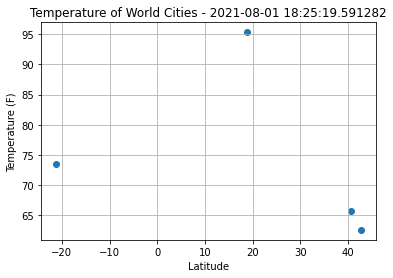

In [10]:
# Current date time in local system
current_dt = datetime.now()

plt.scatter(cool_cities_df["lat"], cool_cities_df["temp"], marker="o")

# Incorporate the other graph properties
title = f"Temperature of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureofWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

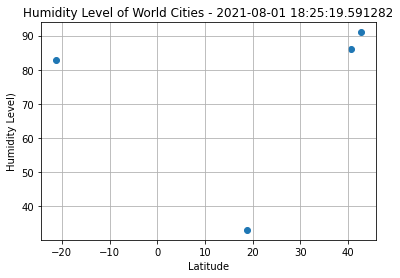

In [11]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["humid"], marker="o")

# Incorporate the other graph properties
title = f"Humidity Level of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Humidity Level)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityofWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

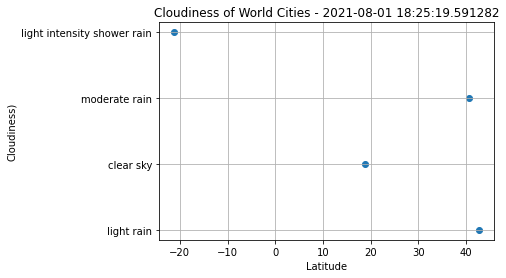

In [12]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["cover"], marker="o")

# Incorporate the other graph properties
title = f"Cloudiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Cloudiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessofWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

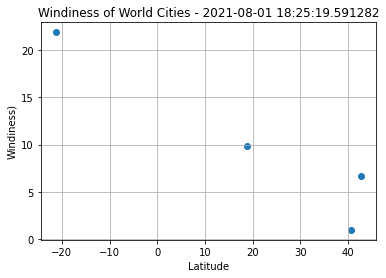

In [13]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Windiness of World Cities")
title = f"Windiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Windiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessofWorldCities.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression